<a href="https://colab.research.google.com/github/shobhi1998/Telecom-Churn-Analysis/blob/main/EDA_Final__team_collabTelecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

Churn is a problem in Telecom Companies as it is more expensive to acquire a new customer than to keep your existing one from leaving.Customer churn prediction detects customers who are likely to cancel a subscription to a service.

By analyzing this dataset,we will try to conjecture the factors which affect the customer churn.

Now ,lets play with the numbers in dataset:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Alma DS/Projects/EDA-  Telecom Churn Analysis/Telecom Churn.csv",engine='python')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Display randomly selected 5 rows of the dataset
df.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
407,DE,122,510,No,No,0,157.1,134,26.71,184.9,122,15.72,197.2,59,8.87,8.5,5,2.30,4,True
415,DE,113,415,No,No,0,239.7,47,40.75,282.9,110,24.05,238.4,88,10.73,8.7,3,2.35,2,True
1263,MA,40,408,No,Yes,31,224.7,69,38.20,134.5,81,11.43,120.3,104,5.41,7.5,5,2.03,1,True
1297,HI,98,415,No,Yes,31,181.6,112,30.87,220.7,100,18.76,236.3,121,10.63,12.9,4,3.48,2,False
773,MA,127,408,Yes,No,0,176.9,110,30.07,167.9,100,14.27,182.2,138,8.20,7.7,2,2.08,1,True


In [ ]:
print("data has",df.shape[0]," rows and ", df.shape[1], "columns")
print("-"*50)
print(df.info())

data has 3333  rows and  20 columns
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total 

Churn column is the target variable which of boolean type. Apart from that, 3 object type features, 8 float and 8 int type features are present in the dataset.

lets checks the null values in datasets.

In [ ]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

there is no null values in the dataset.

In [ ]:
# create the categorial columns 
categorial1=df.select_dtypes(include=['object'])
categorial1.head()

,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No


In [ ]:
#create for loop to print distinct values from the columns
for col in categorial1:
   print(f'Distinct values in categorial columns {col} are:{categorial1[col].unique()}')

Distinct values in categorial columns State are:['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Distinct values in categorial columns International plan are:['No' 'Yes']
Distinct values in categorial columns Voice mail plan are:['Yes' 'No']


Text(0.5, 1.0, 'duplicate rows in dataset')

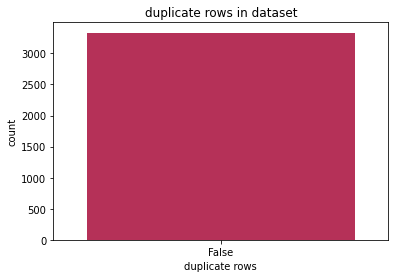

In [ ]:
#duplicate rows 
plt.figure(figsize=(6,4))
sns.countplot(x=df.duplicated(),palette='rocket')
plt.xlabel('duplicate rows')
plt.ylabel('count')
plt.title('duplicate rows in dataset')

In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

**question-** Lets find out the churn rate of the company.

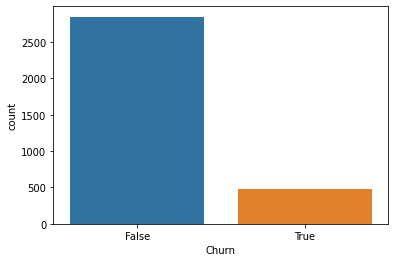

In [ ]:
sns.countplot(data=df,x='Churn')

In [ ]:
comp_churn_rate = df['Churn'].value_counts()[1]*100/df.shape[0]
print("The churn for the company is :", comp_churn_rate,"%")

The churn for the company is : 14.491449144914492 %


Churn rate is defined as the ratio of total customer lost during the period to the total customer at the beginning.

**question-** find out the relationship between the catogrical features and the churn rate. Identify which catogory has maximum churn value?

In [ ]:
print(df['State'].unique())
print('Total number of unique states are',df['State'].unique().shape[0])
print("*"*50)
#print(df_cat['International plan'].unique())
print("*"*50)
print(df['Voice mail plan'].unique())
print("*"*50)
print(df['Area code'].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Total number of unique states are 51
**************************************************
**************************************************
['Yes' 'No']
**************************************************
[415 408 510]


All 3 object features are of catogorical type
<br> - States have 51 unique states name
<br> - International plan - catogorical feature of 2 catogory, either customer has activated international plan or not.
<br> - Voice mail plan - catogorical feature of 2 catogory, either customer has activated Voice maill plan or not 
<br> - Area code has total 3 catogory

In [ ]:
def histogram_for_pop(df):
  plt.style.use("fivethirtyeight")
  plt.figure(figsize= (20,22))
  color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
  for i,col in enumerate(df.columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(8,3, i+1)
    sns.countplot(data=df,x=df[col], color = rand_col, fill = rand_col)
    plt.title(col, color = 'black')
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()
def count_cat_feature(df,col):
  df1 = df[col].value_counts().reset_index()
  return df1.rename(columns={df1.columns[0]:col,df1.columns[1]:"count"})


   Area code  count
0        415   1655
1        510    840
2        408    838
--------------------------------------------------
  International plan  count
0                 No   3010
1                Yes    323
--------------------------------------------------
  Voice mail plan  count
0              No   2411
1             Yes    922


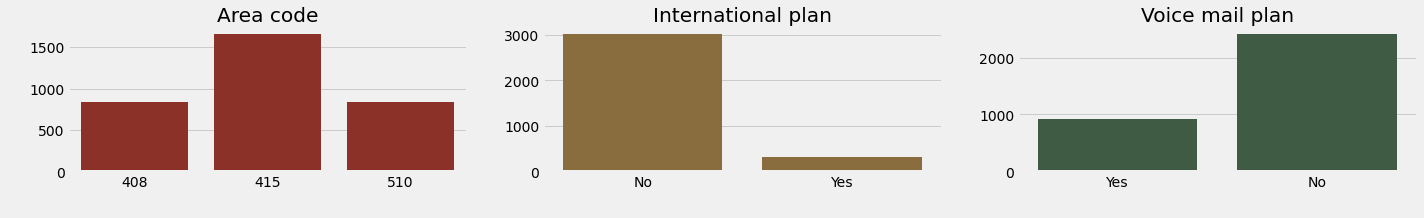

In [ ]:
# For total customer
df_cat = df[['Area code', 'International plan','Voice mail plan']]
histogram_for_pop(df_cat)

Area_code_df = count_cat_feature(df_cat,col="Area code")
int_plan_df = count_cat_feature(df_cat,col="International plan")
v_m_p_df = count_cat_feature(df_cat,col="Voice mail plan")

print(Area_code_df)
print("-"*50)
print(int_plan_df)
print("-"*50)
print(v_m_p_df)



##print("-"*100)
##print(data["International plan"].value_counts())
#print("-"*100)
#print(data["Voice mail plan"].value_counts())


The above analysis is done for all the customer present.

Lets try and identify the churn values for different catogorical feature.

   Area code  count
0        415    236
1        510    125
2        408    122
--------------------------------------------------
  International plan  count
0                 No    346
1                Yes    137
--------------------------------------------------
  Voice mail plan  count
0              No    403
1             Yes     80


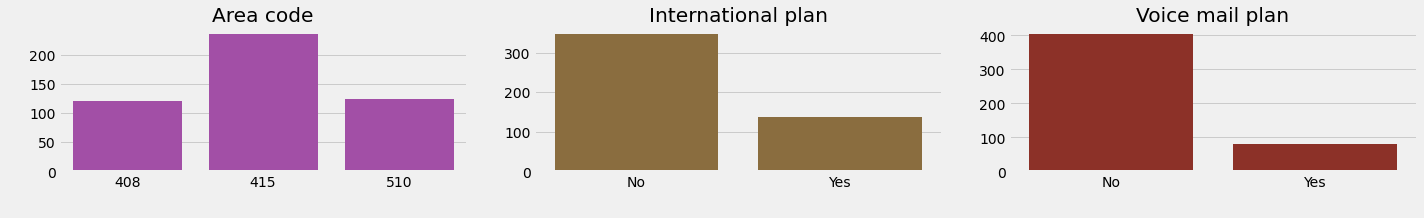

In [ ]:
# for whom the churn value is true
data_churn = df[df['Churn']==True]
data_churn_count = data_churn[['Area code', 'International plan','Voice mail plan']]

histogram_for_pop(data_churn_count)

Area_code_churn = count_cat_feature(data_churn_count,col="Area code")
int_plan_churn = count_cat_feature(data_churn_count,col="International plan")
v_m_p_churn = count_cat_feature(data_churn_count,col="Voice mail plan")

print(Area_code_churn)
print("-"*50)
print(int_plan_churn)
print("-"*50)
print(v_m_p_churn)


In [ ]:
# lets calculate churn rate for each cotegory Churn_rate = churn value / total count
def churn_rate(total_df,churn_df):
  return churn_df['count']*100/total_df['count']

Area_code_churn['churn rate'] = churn_rate(Area_code_df,Area_code_churn)
int_plan_churn['churn rate'] = churn_rate(int_plan_df,int_plan_churn)
v_m_p_churn['churn rate'] = churn_rate(v_m_p_df,v_m_p_churn)

In [ ]:
print(Area_code_churn)
print("-"*50)
print(int_plan_churn)
print("-"*50)
print(v_m_p_churn)

   Area code  count  churn rate
0        415    236   14.259819
1        510    125   14.880952
2        408    122   14.558473
--------------------------------------------------
  International plan  count  churn rate
0                 No    346   11.495017
1                Yes    137   42.414861
--------------------------------------------------
  Voice mail plan  count  churn rate
0              No    403   16.715056
1             Yes     80    8.676790


In [ ]:
def bar_for_churn(df,col1,col2,col3,col4 = comp_churn_rate):
  plt.style.use("fivethirtyeight")
  plt.figure(figsize= (5,3))
  color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
  rand_col = color_[random.sample(range(6), 1)[0]]
  plt.bar(col1,df[col2],tick_label=df[col3], color = rand_col, fill = rand_col)
  plt.axhline(col4,color = 'y', linestyle = '--',linewidth = 2,label='company churn rate')
  plt.title(col3, color = 'black')
  plt.ylabel(" ")
  plt.xlabel(" ")
  plt.tight_layout()
  plt.show()

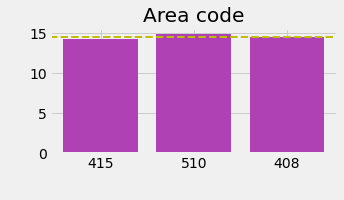

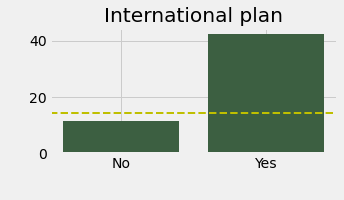

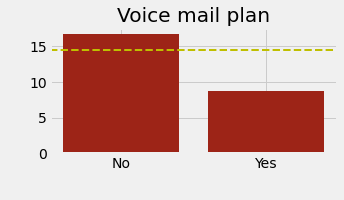

In [ ]:
left_coordinates=[1,2,3]
bar_for_churn(Area_code_churn,left_coordinates,'churn rate','Area code')
left_coordinates1=[1,2]
bar_for_churn(int_plan_churn,left_coordinates1,'churn rate','International plan')

bar_for_churn(v_m_p_churn,left_coordinates1,'churn rate','Voice mail plan')

since the states value having the total 51 unique values, Lets plot them seperately and calculate the maximum chrun rate

In [ ]:
# for state catogory
state_pop = count_cat_feature(df,col="State")
state_churn = count_cat_feature(data_churn,col="State")
state_churn['churn rate'] = churn_rate(state_pop,state_churn)

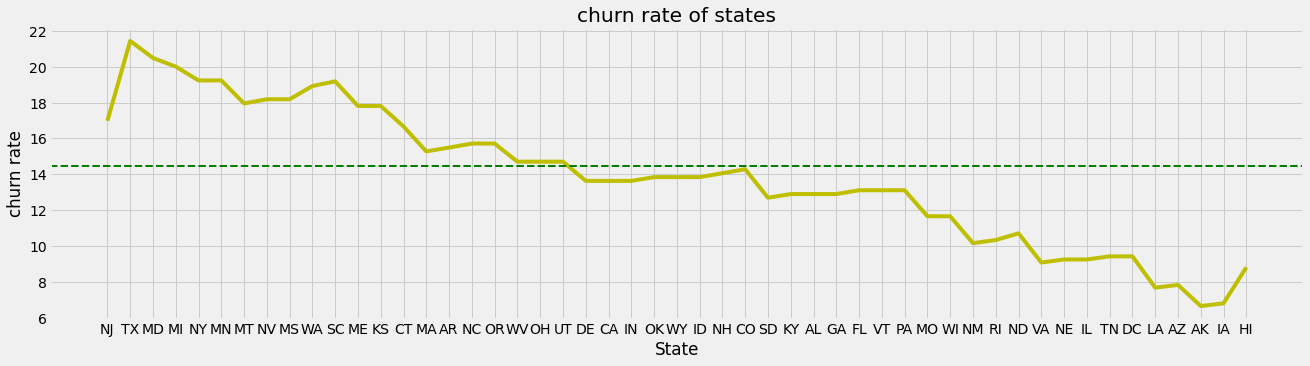

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(state_churn['State'],state_churn['churn rate'],"y")
plt.axhline(comp_churn_rate,color = 'g', linestyle = '--',linewidth = 2,label='company churn rate')
plt.xlabel("State")
plt.ylabel("churn rate")
plt.title("churn rate of states")
plt.show()

In [ ]:
print("maximum person belongs to state:",state_pop['State'][state_pop['count']== max(state_pop['count'])])
print("-"*50)
print("maximum person churns belongs to state:",state_churn['State'][state_pop['count']== max(state_pop['count'])])
print("-"*50)
print("maximum churn rate state:",state_churn['State'][state_churn['churn rate']== max(state_churn['churn rate'])])

maximum person belongs to state: 0    WV
Name: State, dtype: object
--------------------------------------------------
maximum person churns belongs to state: 0    NJ
Name: State, dtype: object
--------------------------------------------------
maximum churn rate state: 1    TX
Name: State, dtype: object


**Observation from cotegorical features**
<br> -The maximum value of churn is observed from Area code 415 and the minimum value from Area code 408.
<br> -The 346 person does not have international plans activated and 137 people have taken the international plans out of the total people who churn.
<br> -The voice mail plan subscription was not taken by 403 and taken by 80 person.
<br> - The maximum churn rate was observed for the customer who have taken the international plan subscriptions approximately 42.41%.
<br> - maximum person belongs to state WV, maximum churn value is from NJ but maximum churn rate is from TX.

**question-** what catogry is having churn rate is higher than the companies average churn rate?


In [ ]:
print("Area code having the higher churn rate than the company average churn rate")
print(Area_code_churn[['Area code','churn rate']][Area_code_churn['churn rate'] >= comp_churn_rate])

Area code having the higher churn rate than the company average churn rate
   Area code  churn rate
1        510   14.880952
2        408   14.558473


In [ ]:
print("International plan having the higher churn rate than the company average churn rate")
print(int_plan_churn[['International plan','churn rate']][int_plan_churn['churn rate'] >= comp_churn_rate])

International plan having the higher churn rate than the company average churn rate
  International plan  churn rate
1                Yes   42.414861


In [ ]:
print("Voice mail plan having the higher churn rate than the company average churn rate")
print(v_m_p_churn[['Voice mail plan','churn rate']][v_m_p_churn['churn rate'] >= comp_churn_rate])

Voice mail plan having the higher churn rate than the company average churn rate
  Voice mail plan  churn rate
0              No   16.715056


In [ ]:
print("States having churn rate higher than the company churn rate")
print(state_churn[['State','churn rate']][state_churn['churn rate'] >= comp_churn_rate])

States having churn rate higher than the company churn rate
   State  churn rate
0     NJ   16.981132
1     TX   21.428571
2     MD   20.481928
3     MI   20.000000
4     NY   19.230769
5     MN   19.230769
6     MT   17.948718
7     NV   18.181818
8     MS   18.181818
9     WA   18.918919
10    SC   19.178082
11    ME   17.808219
12    KS   17.808219
13    CT   16.666667
14    MA   15.277778
15    AR   15.492958
16    NC   15.714286
17    OR   15.714286
18    WV   14.705882
19    OH   14.705882
20    UT   14.705882


In [ ]:
#create dataframe of numerical columns
numerical_df1 = df._get_numeric_data()
numerical_df1.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#create for loop to print unique values in numerical columns
for col in numerical_df1:
  print(f'Unique values in numerical columns {col} are: {numerical_df1[col].unique()[:5]}')

Unique values in numerical columns Account length are: [128 107 137  84  75]
Unique values in numerical columns Area code are: [415 408 510]
Unique values in numerical columns Number vmail messages are: [25 26  0 24 37]
Unique values in numerical columns Total day minutes are: [265.1 161.6 243.4 299.4 166.7]
Unique values in numerical columns Total day calls are: [110 123 114  71 113]
Unique values in numerical columns Total day charge are: [45.07 27.47 41.38 50.9  28.34]
Unique values in numerical columns Total eve minutes are: [197.4 195.5 121.2  61.9 148.3]
Unique values in numerical columns Total eve calls are: [ 99 103 110  88 122]
Unique values in numerical columns Total eve charge are: [16.78 16.62 10.3   5.26 12.61]
Unique values in numerical columns Total night minutes are: [244.7 254.4 162.6 196.9 186.9]
Unique values in numerical columns Total night calls are: [ 91 103 104  89 121]
Unique values in numerical columns Total night charge are: [11.01 11.45  7.32  8.86  8.41]
Uni

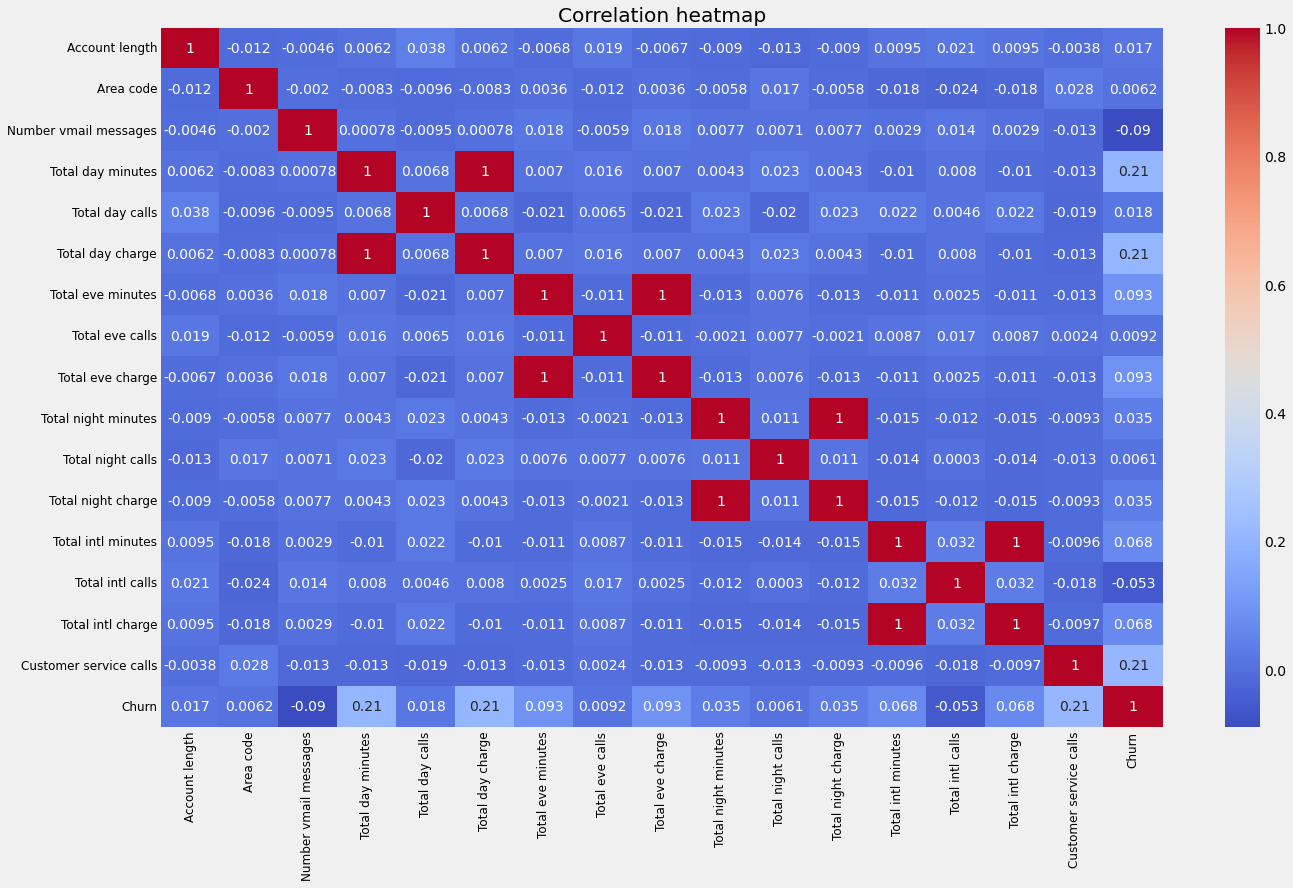

In [ ]:
#create heatmap of above correlation matrix 
plt.figure(figsize=(20,12))
sns.heatmap(numerical_df1.corr(),annot=True,cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation heatmap');

**Inference**
<br> -From correlation heatmap it can be seen that the correlation value of  "Total day minutes","Total day charges","Customer service calls" have higher value comparatively.
<br> - "Number Vmail messages" and "Total intl calls" only have negative correlation.
<br>- Total day minutes and Total day charge, Total night minutes and Total night charge, Total intl minutes and Total intl charge are highly correlated with each other have correlation coeffecient value equals to 1.

**question-** From correlation matrix the above "Total day minutes","Total day charges","Customer service calls" have higher correlation values, observe how there values vary catogorically?

In [ ]:
def describe_with_boxplot(data, col1):
  sns.boxplot(data=data, x = "Churn", y = data[col1], hue = "Churn")
  c_s_c_churn = data[col1][data['Churn']==True]
  c_s_c_not = data[col1][data['Churn']==False]
  print("describe with churn = True")
  print(c_s_c_churn.describe())
  print("-"*50)
  print("describe with churn = False")
  print(c_s_c_not.describe())


**Total day minutes**

describe with churn = True
count    483.000000
mean     206.914079
std       68.997792
min        0.000000
25%      153.250000
50%      217.600000
75%      265.950000
max      350.800000
Name: Total day minutes, dtype: float64
--------------------------------------------------
describe with churn = False
count    2850.000000
mean      175.175754
std        50.181655
min         0.000000
25%       142.825000
50%       177.200000
75%       210.300000
max       315.600000
Name: Total day minutes, dtype: float64


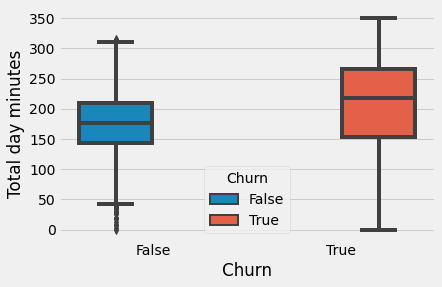

In [ ]:
describe_with_boxplot(df,'Total day minutes')

**Inference**
<br> The median value for customer who churn is 217,and who do not churn is 177.
<br> The total day minutes cunsumption value is higher for person who churns.

**Total day charge**

describe with churn = True
count    483.000000
mean      35.175921
std       11.729710
min        0.000000
25%       26.055000
50%       36.990000
75%       45.210000
max       59.640000
Name: Total day charge, dtype: float64
--------------------------------------------------
describe with churn = False
count    2850.000000
mean       29.780421
std         8.530835
min         0.000000
25%        24.282500
50%        30.120000
75%        35.750000
max        53.650000
Name: Total day charge, dtype: float64


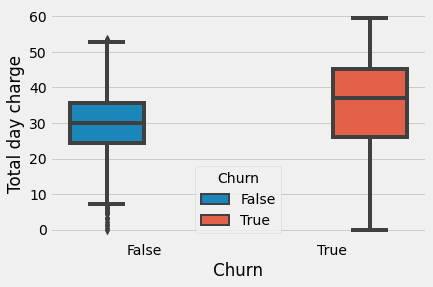

In [ ]:
describe_with_boxplot(df,"Total day charge")

**Inference**
<br> The median value for customer who churn is 36,and who do not churn is 30 i.e. higher for person who churn.

**Customer service calls**

describe with churn = True
count    483.000000
mean       2.229814
std        1.853275
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: Customer service calls, dtype: float64
--------------------------------------------------
describe with churn = False
count    2850.000000
mean        1.449825
std         1.163883
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Customer service calls, dtype: float64


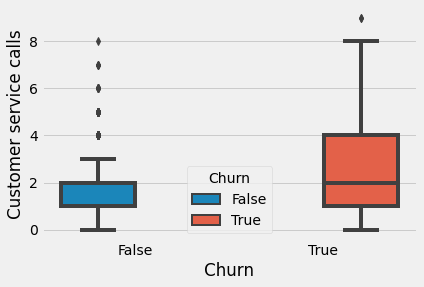

In [ ]:
describe_with_boxplot(df,"Customer service calls")

**Inference**
<br>  Approximately 25% of customer who churns make calls to customer service more than 4 times but who does not churn only 5 people have call more than 4 times.
<br> the mean value is approximately twice than who does not churn. 

# Taking Necessary Columns Only

In [ ]:
# Fetch Columns
new_df = df[['State','Account length', 'Area code','Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes',
             'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls',
             'Total intl charge', 'Customer service calls']]
new_df.head(6)

,State,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,AL,118,510,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0


#Find out total minutes spend in day ,evening and night by diff states resp. and plot a comparison graph accordingly.


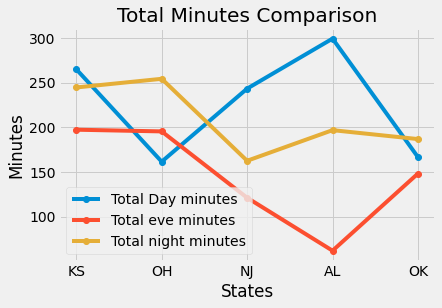

In [ ]:
States=['KS','OH','NJ','AL','OK']
Total_day_minutes=[265.1,161.6,243.4,299.4,166.7]
Total_eve_minutes=[197.4,195.5,121.2,61.9,148.3]
Total_night_minutes=[244.7,254.4,162.6,196.9,186.9]

plt.plot(States,Total_day_minutes,label='Total Day minutes',marker='o')
plt.plot(States,Total_eve_minutes,label='Total eve minutes',marker='o')
plt.plot(States,Total_night_minutes,label='Total night minutes',marker='o')

plt.xlabel('States')
plt.ylabel('Minutes')
plt.title('Total Minutes Comparison')
plt.legend()
plt.show()


From the above graph , we can infer that :

*  Total minutes spent in a day for states OH and OK are in the range of 150 to 175 minutes while the same for state AL are maximum upto 300 minutes. 

*   If we check the same for evening , maximum time depleted is upto 200 minutes by the states KS and OH on the contrary with state AL who spends hardly less than 50 minutes.

*  For Night time, all the states consumed estimated duration is in the range of 150 to 260 minutes.






# Now lets check the scenerio about toatl day,evening and night calls

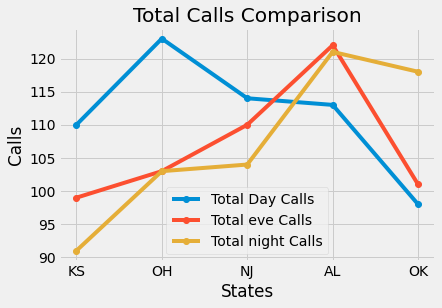

In [ ]:
States=['KS','OH','NJ','AL','OK']
Total_day_calls=[110,123,114,113,98]
Total_eve_calls=[99,103,110,122,101]
Total_night_calls=[91,103,104,121,118]

plt.plot(States,Total_day_calls,label='Total Day Calls',marker='o')
plt.plot(States,Total_eve_calls,label='Total eve Calls',marker='o')
plt.plot(States,Total_night_calls,label='Total night Calls',marker='o')

plt.xlabel('States')
plt.ylabel('Calls')
plt.title('Total Calls Comparison')
plt.legend()
plt.show()


From the plot above, we can predict the maximum calls done by state OH are in the day time.

On the other hand, maximum calls done by state AL are in the evening and night time.

In addition to this ,Customers in State KS prefers minimum nunmber of call in night time.

#What happens if we compare total charges at day ,evening and night, just give it a look...

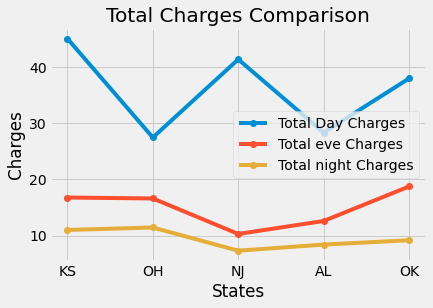

In [ ]:
States=['KS','OH','NJ','AL','OK']
Total_day_charges=[45.07,27.47,41.38,28.34,37.98]
Total_eve_charges=[16.78,16.62,10.30,12.61,18.75]
Total_night_charges=[11.01,11.45,7.32,8.41,9.18]

plt.plot(States,Total_day_charges,label='Total Day Charges',marker='o')
plt.plot(States,Total_eve_charges,label='Total eve Charges',marker='o')
plt.plot(States,Total_night_charges,label='Total night Charges',marker='o')

plt.xlabel('States')
plt.ylabel('Charges')
plt.title('Total Charges Comparison')
plt.legend()
plt.show()


From the above line graph, we can conclude that :

The customers in the above states have to pay more charges if they wants to call in the day time.

While if they choose to call in the night time, they have to pay minimum wage as comapred to day.

Similarly we can chart graphs differentiating total time spent on calls and their prescribed charges with respect to day, evening, night and international calls in various states.




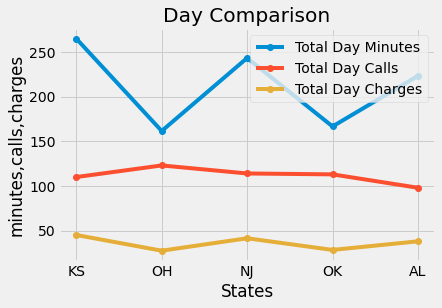

In [ ]:

States=['KS','OH','NJ','OK','AL']
Total_day_minutes=[265.1,161.6,243.4,166.7,223.4]
Total_day_calls=[110,123,114,113,98]
Total_day_charges=[45.07,27.47,41.38,28.34,37.98]

plt.plot(States,Total_day_minutes,label='Total Day Minutes',marker='o')
plt.plot(States,Total_day_calls,label='Total Day Calls',marker='o')
plt.plot(States,Total_day_charges,label='Total Day Charges',marker='o')

plt.xlabel('States')
plt.ylabel('minutes,calls,charges')
plt.title('Day Comparison')
plt.legend()
plt.show()


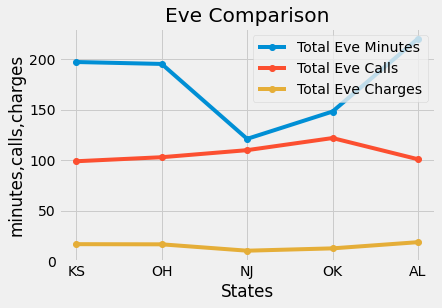

In [ ]:
States=['KS','OH','NJ','OK','AL']
Total_eve_minutes=[197.4,195.5,121.2,148.3,220.6]
Total_eve_calls=[99,103,110,122,101]
Total_eve_charges=[16.78,16.62,10.30,12.61,18.75]

plt.plot(States,Total_eve_minutes,label='Total Eve Minutes',marker='o')
plt.plot(States,Total_eve_calls,label='Total Eve Calls',marker='o')
plt.plot(States,Total_eve_charges,label='Total Eve Charges',marker='o')

plt.xlabel('States')
plt.ylabel('minutes,calls,charges')
plt.title('Eve Comparison')
plt.legend()
plt.show()

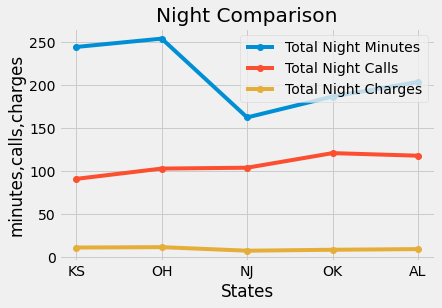

In [ ]:
States=['KS','OH','NJ','OK','AL']
Total_night_minutes=[244.7,254.4,162.6,186.9,203.9]
Total_night_calls=[91,103,104,121,118]
Total_night_charges=[11.01,11.45,7.32,8.41,9.18]

plt.plot(States,Total_night_minutes,label='Total Night Minutes',marker='o')
plt.plot(States,Total_night_calls,label='Total Night Calls',marker='o')
plt.plot(States,Total_night_charges,label='Total Night Charges',marker='o')

plt.xlabel('States')
plt.ylabel('minutes,calls,charges')
plt.title('Night Comparison')
plt.legend()
plt.show()


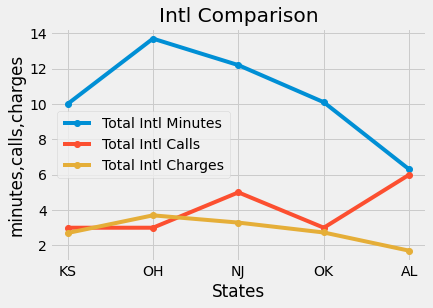

In [ ]:
States=['KS','OH','NJ','OK','AL']
Total_intl_minutes=[10.0,13.7,12.2,10.1,6.3]
Total_intl_calls=[3,3,5,3,6]
Total_intl_charges=[2.70,3.70,3.29,2.73,1.70]

plt.plot(States,Total_intl_minutes,label='Total Intl Minutes',marker='o')
plt.plot(States,Total_intl_calls,label='Total Intl Calls',marker='o')
plt.plot(States,Total_intl_charges,label='Total Intl Charges',marker='o')

plt.xlabel('States')
plt.ylabel('minutes,calls,charges')
plt.title('Intl Comparison')
plt.legend()
plt.show()

# comparing both night and day users

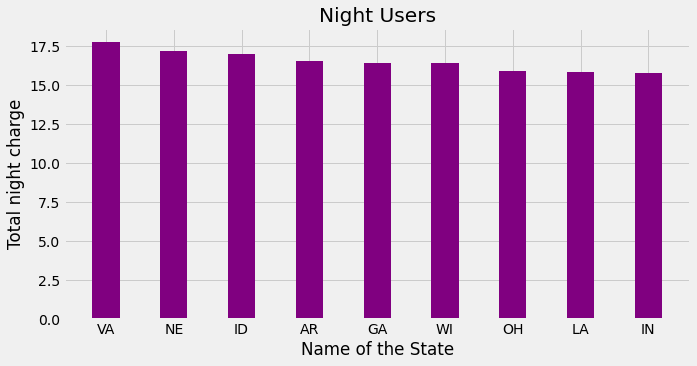

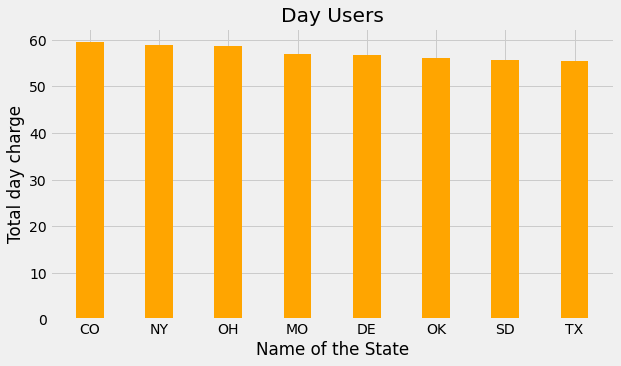

In [ ]:
#Fetch The busiest  at night
night_user = df.groupby(['State','Total night minutes','Total night calls'])['Total night charge'].max().reset_index()
night_user = night_user.sort_values(by='Total night charge', ascending=False).head(10)
night_user

# Fetch The busiest  at day
day_user = df.groupby(['State','Total day minutes','Total day calls'])['Total day charge'].max().reset_index()
day_user = day_user.sort_values(by='Total day charge', ascending=False).head(10)
day_user

#create the bar graph
state = night_user['State']
charge = night_user['Total night charge']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='purple',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total night charge")
plt.title("Night Users")
plt.show()

#create the bar graph
state = day_user['State']
charge = day_user['Total day charge']

fig = plt.figure(figsize = (9, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='orange',
        width = 0.4)
 
plt.xlabel("Name of the State")
plt.ylabel("Total day charge")
plt.title("Day Users")
plt.show()


In [ ]:
# Fetch State with Total day charge
hosts_state = df.groupby(['State'])['Total day charge'].max().reset_index()
hosts_state.sort_values(by='Total day charge', ascending=False).head(5)

  

,State,Total day charge
5,CO,59.64
34,NY,58.96
35,OH,58.70
24,MO,57.04
8,DE,56.83


**Total day minutes**

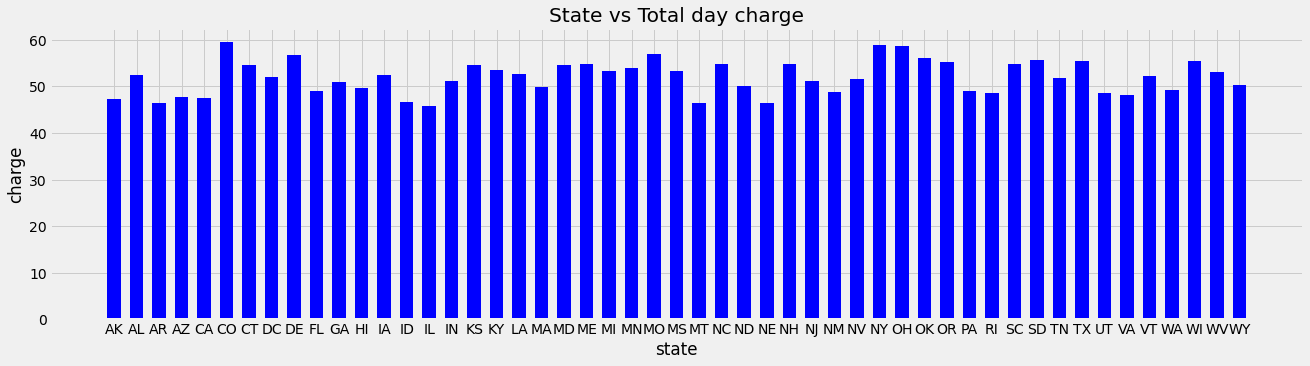

In [ ]:
#Plot the bar graph
state = hosts_state['State']
charge = hosts_state['Total day charge']

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(state, charge, color ='blue',
        width = 0.6)
 
plt.xlabel("state")
plt.ylabel("charge")
plt.title("State vs Total day charge")
plt.show()

### **Fetch State with Total eve charge**

In [ ]:
# Fetch State with Total eve charge
hosts_state = df.groupby(['State'])['Total eve charge'].max().reset_index()
hosts_state.sort_values(by='Total eve charge', ascending=False).head(5)

,State,Total eve charge
27,NC,30.91
15,IN,30.75
20,MD,30.11
18,LA,29.89
2,AR,29.83


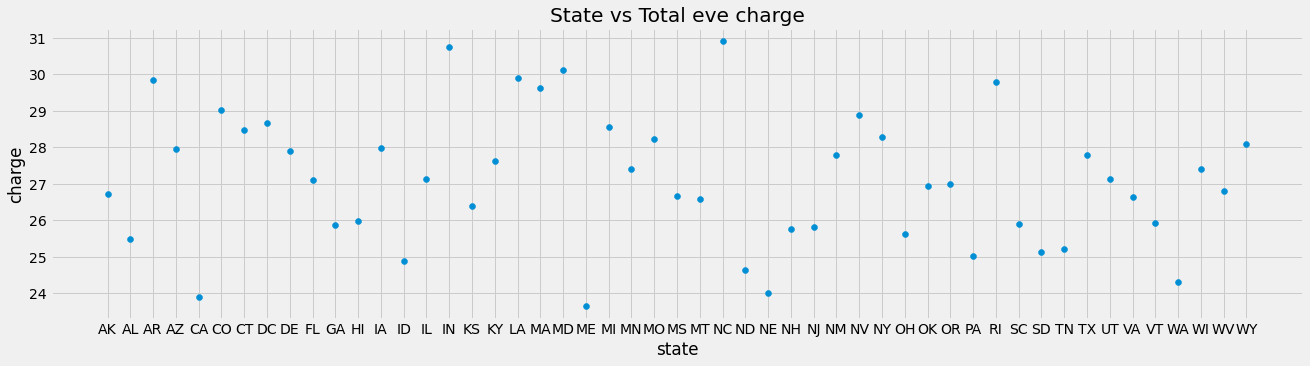

In [ ]:
#Plot the bar graph
state = hosts_state['State']
charge = hosts_state['Total eve charge']

fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.scatter(state, charge)
 
plt.xlabel("state")
plt.ylabel("charge")
plt.title("State vs Total eve charge")
plt.show()

From the above scatter graph, we can anticipate that the total evening charges applicable on states IN and NC are maximmum, while for the states AR,LA,MA,MD and RI are comparetively higher than the average charges applicable bt other states.
States CA,ME,NE and WA are paying minimal amount for the total evening charges.

## **Cutomer who calls customer care and they Churn**

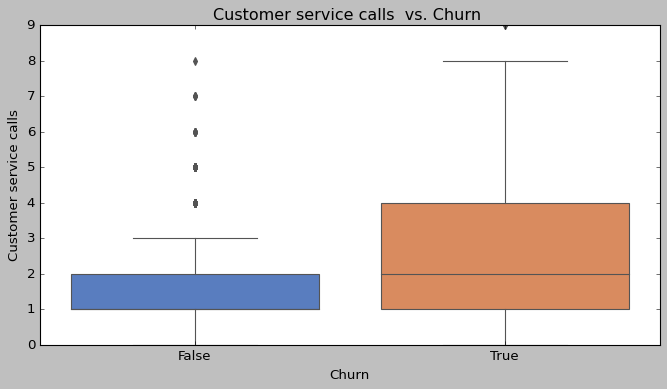

In [ ]:

# Create the Box Plot
plt.style.use('classic')
plt.figure(figsize=(10,5))
plt.title("Customer service calls  vs. Churn ")
sns.boxplot(data=df, x='Churn',y='Customer service calls',palette="muted")
plt.show()

The above observation Shows that customers are having problems with the services and they called customer care multiple times.<br>
<br>Customer who called customer care 2 or more than 2 times have highest rate of churn.<br><br>
customer called the customer care for resolving their problem but company failed to provide the appropriate services to the customers results in lose of customers.

# **Check form which area is having Maximum customers**

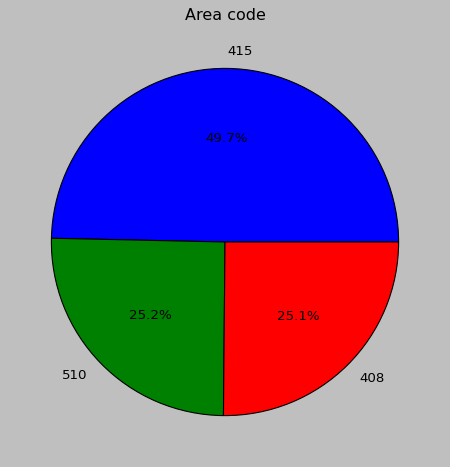

In [ ]:
#Create the Pie 
plt.figure(figsize=(7,7))
plt.pie(df['Area code'].value_counts(),labels=df['Area code'].value_counts().keys(),autopct = '%0.1f%%')
plt.title('Area code');

This Pie chart show that approx 50% of the total states comes under area code '415' and 25.2% of states comes under code '510' and reat 25.1% comes under area code '408'. <br>
This seems that majority of the customers of the are from this Area code '415'.<br>
<br>

*   Majority_customers >> '415'<br>
*   Minority_customers >> '408'

**summary**
<br>Telecom industry faces a major problem that there customer do not stay with the company for too long i.e., they churn. The reason could be anything being the higher call prices or the poor customer services. To analyse one such problem using the above dataset on which we perfored exploratory data analysis.

**Adarsh**
<br> **Catogorical feature**
The Churn rate of company is 16.94%.The catogories having churn rate higher than company churn rate are Area code (510, 408) ,customer having no voice mail plan activated.out of 51, 21 states have churn rate higher than the company churn rate.Customer having international plan have the highest churn rate among all the category explored which is 42.41 %.
<br> **Numerical features**
Total day minutes and Total day charges of person who churns are higher than who do not churn.more than 75% of people who churn have 0 vmail messages, Infact very few of them have vmail messages more than 0.
Approximately 25% of people who churns calls customer service more than 4 times but only 5 people from the people who do not churn makes customer service calls more than 4 times. Also the mean value of customer service calls by people who churn is approximately twice than people who do not churn.Total day minutes and Total day charge, Total night minutes and Total night charge, Total intl minutes and Total intl charge are highly correlated with each other have correlation coeffecient value equals to 1 and there plot is linear. so they are directly proportional to each other.

**Nikita**

We have done analysis on dataset having 3333 rows and 20 columns.Churn column is the target variable.There are no null and duplicate values in the dataset.Churn values are maximum in the area with code 415 and minimum with 408.States named TX,MD and MI have maximum churn rate.
customers having international plans, 137  out of the total 483 churns and 80 customers have voice mail plan subscription.Approximately 25% of customer who churns make calls to customer service more than 4 times but who does not churn only 5 people have call more than 4 times.
the mean value is approximately twice than who does not churn.Total minutes, calls and charge comparison:
Minutes : Total minutes spent in a day for states OH and OK are in the range of 150 to 175 minutes while the same for state AL are maximum upto 300 minutes.If we check the same for evening , maximum time depleted is upto 200 minutes by the states KS and OH on the contrary with state AL who spends hardly less than 50 minutes.
For Night time, all the states consumed estimated duration is in the range of 150 to 260 minutes.
Calls: From the plot above, we can predict the maximum calls done by state OH are in the day time.On the other hand, maximum calls done by state AL are in the evening and night time.In addition to this ,Customers in State KS prefers minimum nunmber of call in night time.
Charges: The customers in the above states have to pay more charges if they wants to call in the day time.While if they choose to call in the night time, they have to pay minimum wage as comapred to day.
Customer who called customer care 2 or more than 2 times have highest rate of churn.customer called the customer care for resolving their problem but company failed to provide the appropriate services to the customers results in lose of customers.Total customers who are not happy with the service and churned are 483 out of 3333 results in the churn rate of 16.94 % for the company.




**Shobhit**


Customers who calls customer care 2 or more than 2 times has the highest probability of terminating the services.Cutomers do day calls, evening calls, night calls and international calls also although international call are less.
The mean value of customer service calls by people who churn is approximately twice than people who do not churn. Majority of the cutomers are from Area code '415'. From the total 2850 did not terminate their services and 483 customers terminate their servies. Cutomers prefer vmail plan only if they required not everyone is having that plan. 
Customer having international plan have the highest churn rate among all the category.
people who churns calls customer service more than 4 times but only 5 people from the people who do not churn makes customer service calls more than 4 times.  Out of 3333 results 483 customer has churn value 'true', result in churn rate is 16.94 % for the company. The average number of customer service calls is 1.5628562856285628.






**Conclusion**
After performing the exploratory data analysis of the above dataset, the following observations were made:
<br> •	categories having churn rate higher than company churn rate are Area code (510, 408), customer having no voice mail plan activated.
<br>•	out of 51, 21 states have churn rate higher than the company churn rate.
<br>•	Customer having international plan have the highest churn rate among all the category explored which is 42.41 % i.e., customers having international plans, 137 out of the total 483 churns.
<br>•	States named TX, MD and MI have maximum churn rate.
<br>•	Total day minutes and Total day charges of person who churns are higher than who do not churn.
<br>•	more than 75% of people who churn have 0 vmail messages, in fact very few of them have vmail messages more than 0.
<br>•	Approximately 25% of people who churns calls customer service more than 4 times but only 5 people from the people who do not churn makes customer service calls more than 4 times. Also, the mean value of customer service calls by people who churn is approximately twice than people who do not churn.
<br>•	Total day minutes and Total day charge, Total night minutes and Total night charge, Total intl minutes and Total intl charge are highly correlated with each other have correlation coefficient value equals to 1 and their plot is linear. so, they are directly proportional to each other.
<br>•	Total customers who are not happy with the service and churned are 483 out of 3333 results in the churn rate of 14.49 % for the company.


**Some measures to reduction Churn rate**
These are some conclusion or recommendations that we are arrived after studying the dataset.
<br>•	The company needs to survey in the Area code 510,408 who have higher churn rate than company average to understand the problem and similar kind of survey can also be done for the states having churn rate higher than the company average churn rate.
<br>•	Company needs to review their international plan because the customers subscribing to international plan have the highest churn rate observed of about 42.41%.
<br>•	Company needs to relook their vmail messages plan.
<br>•	The customer service of the company needs to be improved because it seems they are not able to solve the problem of users efficiently.



















